In [49]:
import cv2
import matplotlib.pyplot as plt
from matplotlib.colors import hsv_to_rgb
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib import colors
import colorsys

In [144]:
imageNames = [
    "5436e3c6bae478396759f233.jpg",
    "5aaf1253116597691362835b.jpg",
    "5aaf12ba116597691362b671.jpg",
    "5aaf13841165976913631d42.jpg",
    "5aaf1320116597691362ea91.jpg",
    "5592cfca9fc3c131551458e7.jpg",
    "5436e3b8bae478396759f18d.jpg"
]

def readAndConvert(image):
    im = cv2.imread(image)
    return cv2.cvtColor(im, cv2.COLOR_BGR2RGB)

images = [readAndConvert(image)for image in imageNames]

colorSpaceCount = 6

RGB = "RGB"
HSV = "HSV"
LUV = "LUV"
LUV_INVERTED = "LUV_INVERTED"
XYZ = "XYZ"
# "YUV": cv2.cvtColor(im_luv, cv2.COLOR_RGB2YUV),
HSL = "HSL"
# GRAY = "GRAY"

def getImageSpaces(im_RGB):
    return {
        RGB: im_RGB,
        HSV: cv2.cvtColor(im_RGB, cv2.COLOR_RGB2HSV),
        LUV: cv2.cvtColor(im_RGB, cv2.COLOR_RGB2LUV),
        LUV_INVERTED: cv2.bitwise_not(cv2.cvtColor(im_RGB, cv2.COLOR_RGB2LUV)),
        XYZ: cv2.cvtColor(im_RGB, cv2.COLOR_RGB2XYZ),
        # "YUV": cv2.cvtColor(im_luv, cv2.COLOR_RGB2YUV),
        HSL: cv2.cvtColor(im_RGB, cv2.COLOR_RGB2HLS)
#         GRAY: cv2.cvtColor(im_RGB, cv2.COLOR_RGB2GRAY)

    }


In [53]:
def showEdgesWithBlur(i):
    row = 2
    col = 3

    fig2, axs = plt.subplots(row,col,  figsize=(20,5))
    
    img = cv2.imread(imageNames[i],0)
    edges = cv2.Canny(img,100,200)
    
#     plt.subplot(121),plt.imshow(img,cmap = 'gray')
#     plt.title('Original Image'), plt.xticks([]), plt.yticks([])
    axs[0, 0].set_title('Image')
    axs[0, 0].imshow(img, cmap='gray')
    
#     plt.subplot(122),plt.imshow(edges,cmap = 'gray')
#     plt.title('Edge Image'), plt.xticks([]), plt.yticks([])
    axs[0, 1].set_title('Image')
    axs[0, 1].imshow(edges, cmap='gray')
    
#     plt.subplot(12),plt.imshow(img,cmap = 'gray')
#     plt.title('Edge Image'), plt.xticks([]), plt.yticks([])
    axs[0, 2].set_title('blurred edges')
    axs[0, 2].imshow(cv2.bilateralFilter(edges,9,40,20), cmap='gray')
    
    axs[1, 2].set_title('blurred edges')
    axs[1, 2].imshow(cv2.bilateralFilter(edges,9,40,175), cmap='gray')
    plt.show()

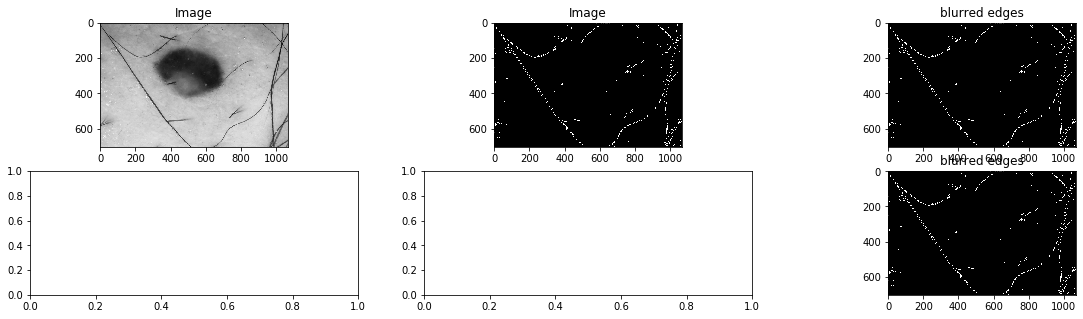

In [69]:
showEdgesWithBlur(0)

In [129]:
def identifyHairs(index):
    img = cv2.imread(imageNames[index])
#     img = cv2.bilateralFilter(img,10,100,9)
    edges = cv2.Canny(img, 200, 250)

    edges2 =cv2.bilateralFilter(edges,10,350,9)

    indices = np.where(edges != [0])
    coordinates = zip(indices[0], indices[1])

    indices2 = np.where(edges2 != [0])
    coordinates2 = zip(indices2[0], indices2[1])

    img2 =  readAndConvert(imageNames[index])
    img3 =  readAndConvert(imageNames[index])

    for c in coordinates:
        img2[c[0], c[1]] = (0,255,0)

    for c in coordinates2:
        img3[c[0], c[1]] = (0,255,0)

    from pylab import array, plot, show, axis, arange, figure, uint8 

    row = 1
    col = 5

    fig2, axs = plt.subplots(row,col,  figsize=(15,5))
    fig2.suptitle('Updated Edges')

    axs[0].set_title('Image')
    axs[0].imshow(img)

    axs[1].set_title('Edges')
    axs[1].imshow(edges)

    axs[2].set_title('Updated Image')
    axs[2].imshow(img2)
    
    axs[3].set_title('Blurred Edges')
    axs[3].imshow(edges2)

    axs[4].set_title('Updated Image Blurred Filter')
    axs[4].imshow(img3)



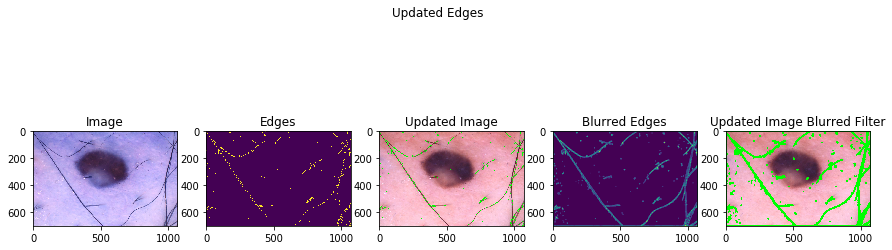

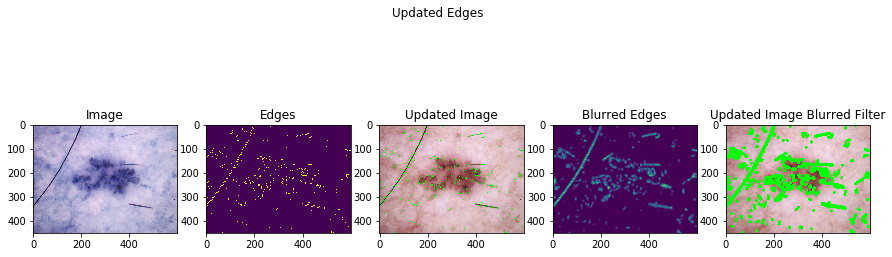

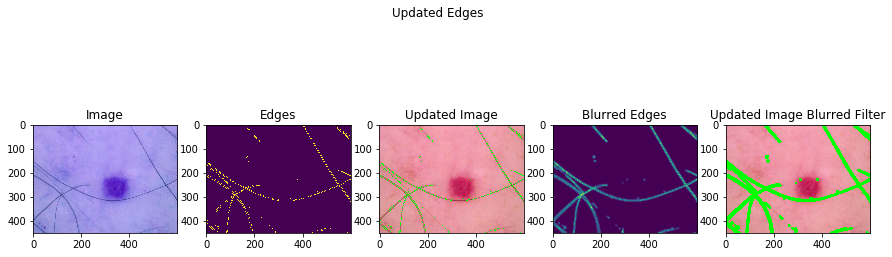

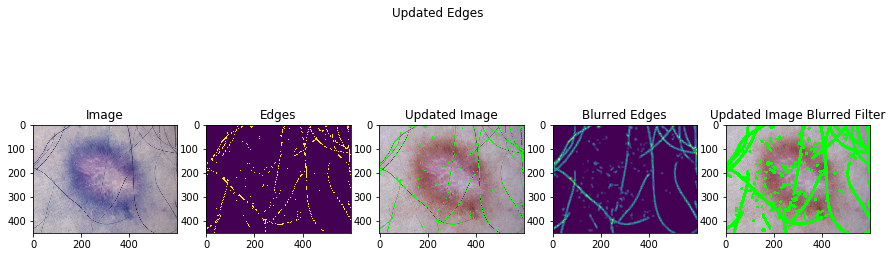

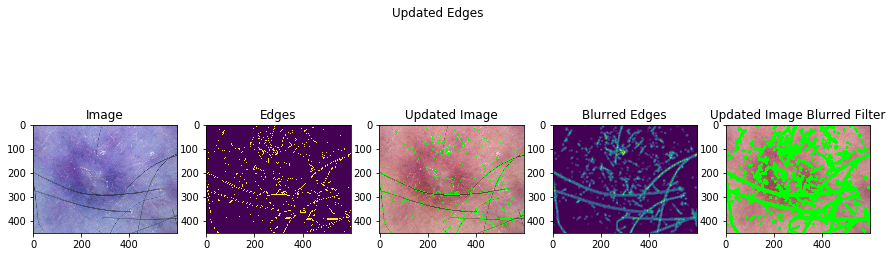

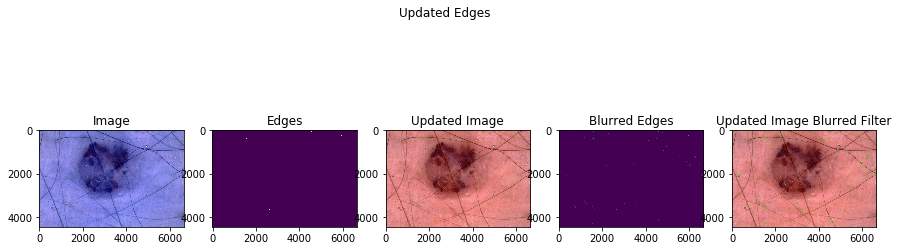

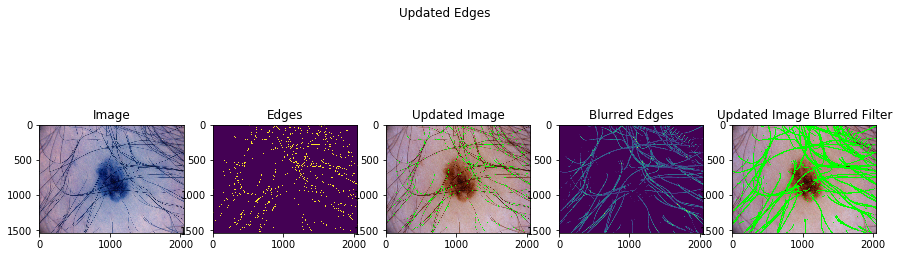

In [128]:
for j in range(7):
    identifyHairs(j)

In [138]:
def identifyHairs2(index):
    img = cv2.imread(imageNames[index])
#     img = cv2.medianBlur(img,5)
    img = cv2.GaussianBlur(img,(5,5),0)
    edges = cv2.Canny(img, 200, 250)

    edges2 =cv2.bilateralFilter(edges,10,350,9)

    indices = np.where(edges != [0])
    coordinates = zip(indices[0], indices[1])

    indices2 = np.where(edges2 != [0])
    coordinates2 = zip(indices2[0], indices2[1])

    img2 =  readAndConvert(imageNames[index])
    img3 =  readAndConvert(imageNames[index])

    for c in coordinates:
        img2[c[0], c[1]] = (0,255,0)

    for c in coordinates2:
        img3[c[0], c[1]] = (0,255,0)

    from pylab import array, plot, show, axis, arange, figure, uint8 

    row = 1
    col = 5

    fig2, axs = plt.subplots(row,col,  figsize=(15,5))
    fig2.suptitle('Updated Edges')

    axs[0].set_title('Image')
    axs[0].imshow(img)

    axs[1].set_title('Edges')
    axs[1].imshow(edges)

    axs[2].set_title('Updated Image')
    axs[2].imshow(img2)
    
    axs[3].set_title('Blurred Edges')
    axs[3].imshow(edges2)

    axs[4].set_title('Updated Image Blurred Filter')
    axs[4].imshow(img3)

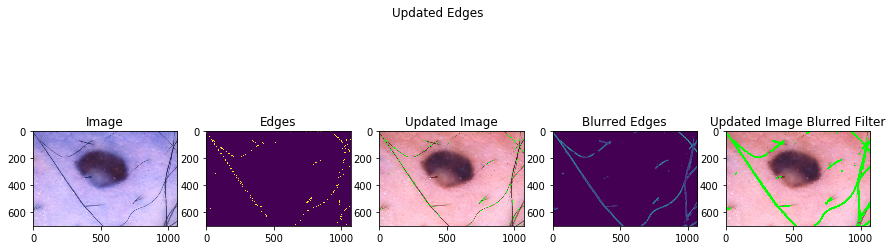

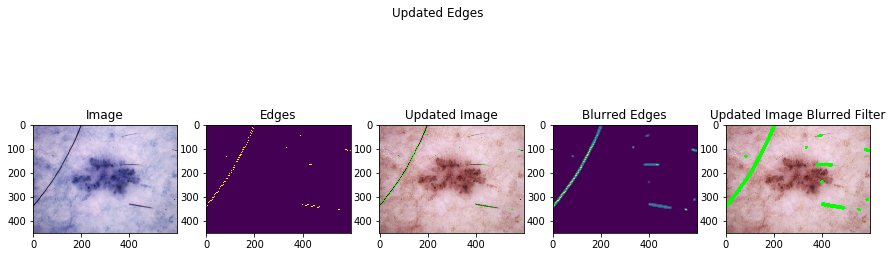

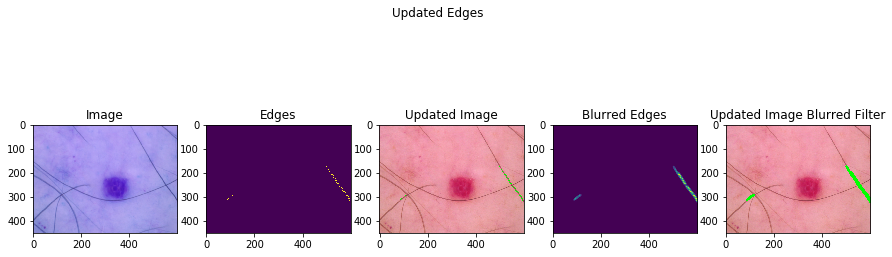

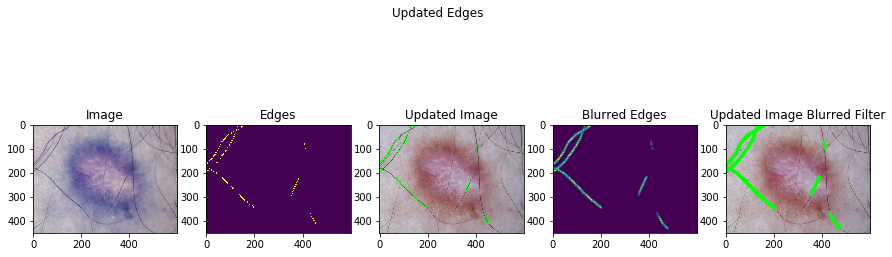

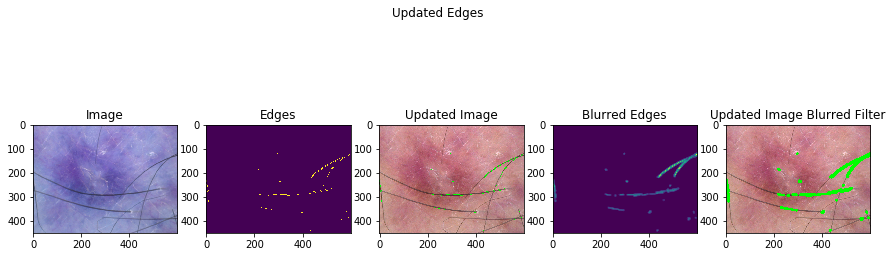

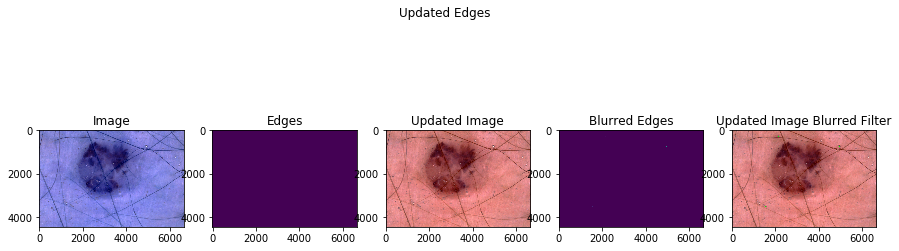

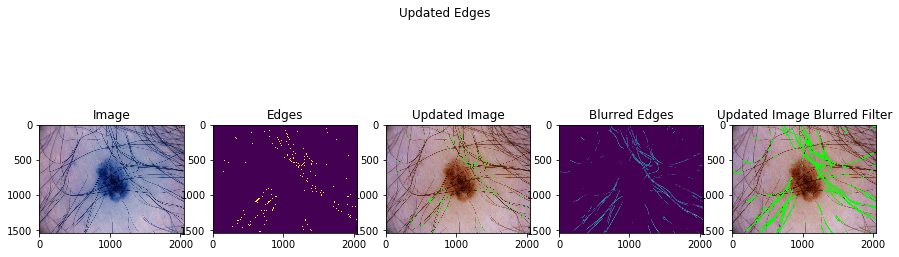

In [139]:
for j in range(7):
    identifyHairs2(j)

In [165]:
def threshold(img, lowThresholdRatio=0.05, highThresholdRatio=0.09):
    
    highThreshold = img.max() * highThresholdRatio;
    lowThreshold = highThreshold * lowThresholdRatio;
    
    M, N = img.shape
    res = np.zeros((M,N), dtype=np.int32)
    
    weak = np.int32(25)
    strong = np.int32(255)
    
    strong_i, strong_j = np.where(img >= highThreshold)
    zeros_i, zeros_j = np.where(img < lowThreshold)
    
    weak_i, weak_j = np.where((img <= highThreshold) & (img >= lowThreshold))
    
    res[strong_i, strong_j] = strong
    res[weak_i, weak_j] = weak

    row = 1
    col = 3

    fig2, axs = plt.subplots(row,col,  figsize=(15,5))
    fig2.suptitle('Updated Edges')

    axs[0].set_title('res')
    axs[0].imshow(res)

#     axs[1].set_title('weak')
#     axs[1].imshow(weak)

#     axs[2].set_title('strong')
#     axs[2].imshow(strong)
    

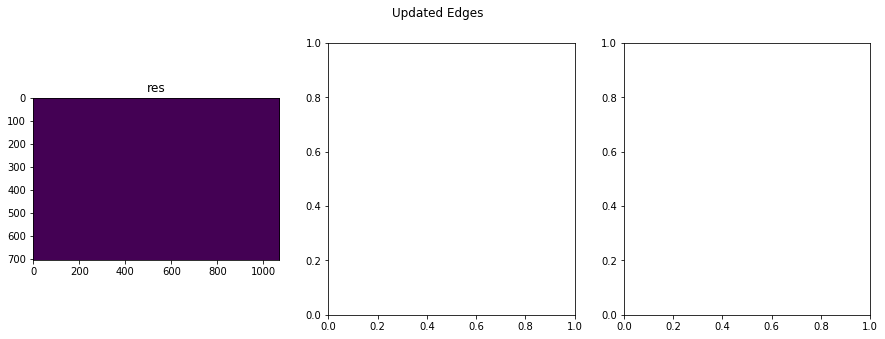

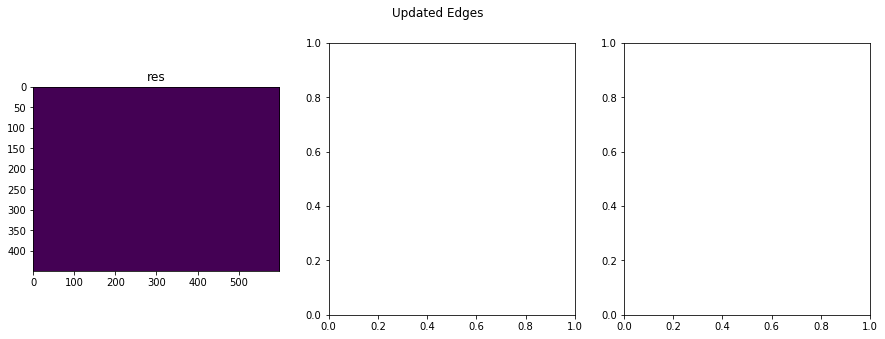

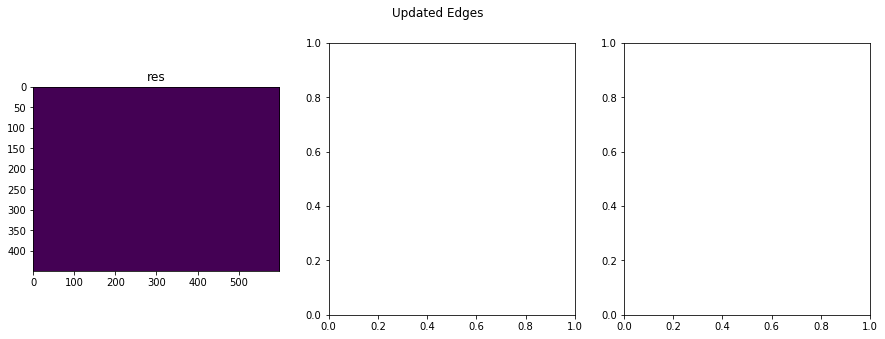

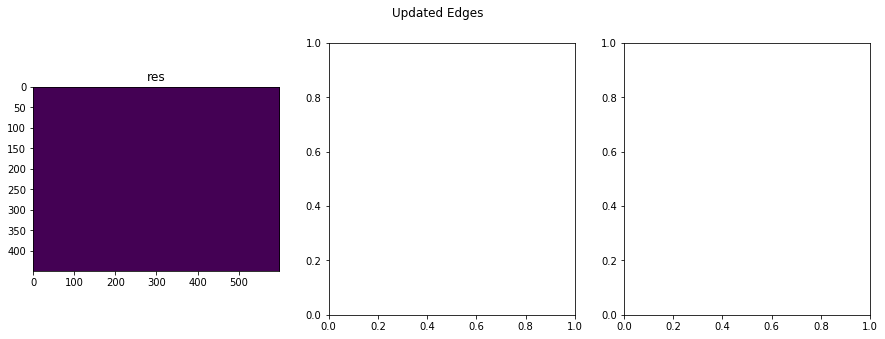

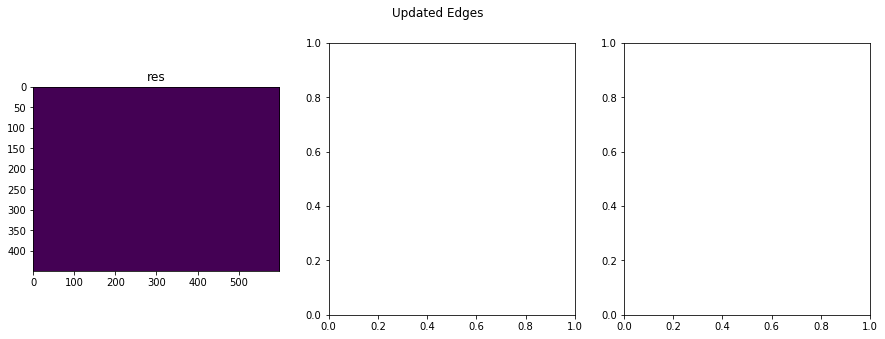

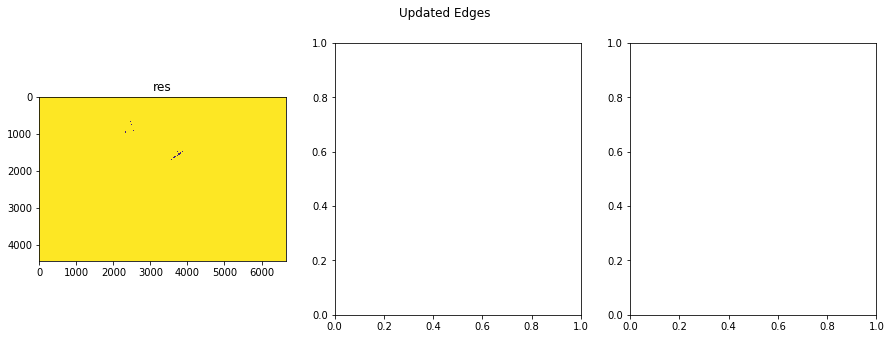

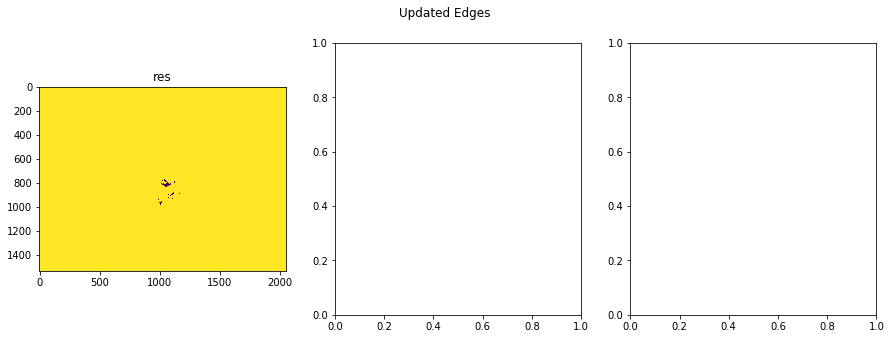

In [166]:
for j in range(7):
    image = cv2.imread(imageNames[j], 0)
#     image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    threshold(image, .01, .09)